In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns


In [2]:
df = pd.read_csv('mymoviedb.csv',encoding='utf-8',engine='python')

In [3]:
df.head(5)

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [4]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9837 entries, 0 to 9836
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9837 non-null   object 
 1   Title              9828 non-null   object 
 2   Overview           9828 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   object 
 5   Vote_Average       9827 non-null   object 
 6   Original_Language  9827 non-null   object 
 7   Genre              9826 non-null   object 
 8   Poster_Url         9826 non-null   object 
dtypes: float64(1), object(8)
memory usage: 691.8+ KB


In [5]:
#show only genres |
df['Genre'].head(5)

0    Action, Adventure, Science Fiction
1              Crime, Mystery, Thriller
2                              Thriller
3    Animation, Comedy, Family, Fantasy
4      Action, Adventure, Thriller, War
Name: Genre, dtype: object

In [6]:
#to check that wheter data is duplicated or not 
df.duplicated().sum()

0

In [7]:
#Basic statics apply on numeric data
df.describe()

,Popularity
count,9827.000000
mean,40.320570
std,108.874308
min,7.100000
25%,16.127500
50%,21.191000
75%,35.174500
max,5083.954000


In [8]:
'''
>> now we have to done our work 
>> so first we remove unnecesaary data like Overview,Original_Language	and poster url 
>> we also have to chage data types like int , time and string 

'''

'\n>> now we have to done our work \n>> so first we remove unnecesaary data like Overview,Original_Language\tand poster url \n>> we also have to chage data types like int , time and string \n\n'

In [9]:
#change data type from object to datetime format
df['Release_Date'] = pd.to_datetime(df['Release_Date'], errors='coerce')
print(df['Release_Date'].dtype)

datetime64[ns]


In [10]:
#convert datetime into only year 
df['Release_Date'] = pd.to_datetime(df['Release_Date'])
df['Release_Date'] = df['Release_Date'].dt.year
df['Release_Date'].dtype

dtype('float64')

In [11]:
df.head(5)

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021.0,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022.0,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022.0,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021.0,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021.0,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [12]:
##now we remove our cloumns which we do not need 
col = ['Overview','Original_Language','Poster_Url']
df.drop(col , axis=1 , inplace= True)
df.columns

Index(['Release_Date', 'Title', 'Popularity', 'Vote_Count', 'Vote_Average',
       'Genre'],
      dtype='object')

In [13]:
df.head(5)

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021.0,Spider-Man: No Way Home,5083.954,8940,8.3,"Action, Adventure, Science Fiction"
1,2022.0,The Batman,3827.658,1151,8.1,"Crime, Mystery, Thriller"
2,2022.0,No Exit,2618.087,122,6.3,Thriller
3,2021.0,Encanto,2402.201,5076,7.7,"Animation, Comedy, Family, Fantasy"
4,2021.0,The King's Man,1895.511,1793,7.0,"Action, Adventure, Thriller, War"


Now we have to lable the vote averge in four section Popular , average , below-average and not popular using a user define function 

In [14]:
def catagoried_col(df, col, labels):
    edges = [
        df[col].describe()['min'],
        df[col].describe()['25%'],
        df[col].describe()['50%'],
        df[col].describe()['75%'],
        df[col].describe()['max']
    ]
    df[col] = pd.cut(df[col], edges, labels=labels, duplicates='drop')
    return df



In [15]:

labels = ['not_popular', 'below_average', 'average', 'popular']
df['Vote_Average'] = pd.to_numeric(df['Vote_Average'], errors='coerce')
catagoried_col(df, 'Vote_Average', labels)
df['Vote_Average'].unique() 


['popular', 'below_average', 'average', 'not_popular', NaN]
Categories (4, object): ['not_popular' < 'below_average' < 'average' < 'popular']

In [16]:
df.head(5)

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021.0,Spider-Man: No Way Home,5083.954,8940,popular,"Action, Adventure, Science Fiction"
1,2022.0,The Batman,3827.658,1151,popular,"Crime, Mystery, Thriller"
2,2022.0,No Exit,2618.087,122,below_average,Thriller
3,2021.0,Encanto,2402.201,5076,popular,"Animation, Comedy, Family, Fantasy"
4,2021.0,The King's Man,1895.511,1793,average,"Action, Adventure, Thriller, War"


In [17]:
df['Vote_Average'].value_counts()

Vote_Average
not_popular      2467
popular          2450
average          2411
below_average    2398
Name: count, dtype: int64

In [18]:
#now we split the genre in its seperate tags 

df['Genre']= df['Genre'].str.split(', ')
df =df.explode('Genre').reset_index(drop=True)
df.head(6)

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021.0,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021.0,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021.0,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction
3,2022.0,The Batman,3827.658,1151,popular,Crime
4,2022.0,The Batman,3827.658,1151,popular,Mystery
5,2022.0,The Batman,3827.658,1151,popular,Thriller


In [19]:
#casting the column into catagory 

df['Genre'] = df['Genre'].astype('category')
df['Genre'].dtype

CategoricalDtype(categories=['Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
                  'Documentary', 'Drama', 'Family', 'Fantasy', 'History',
                  'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
                  'TV Movie', 'Thriller', 'War', 'Western'],
, ordered=False, categories_dtype=object)

now our data is completely ready for getting inshights 

In [20]:
sns.set_style('whitegrid')

1) What is the most frequent genre of movies released on Netflix? 

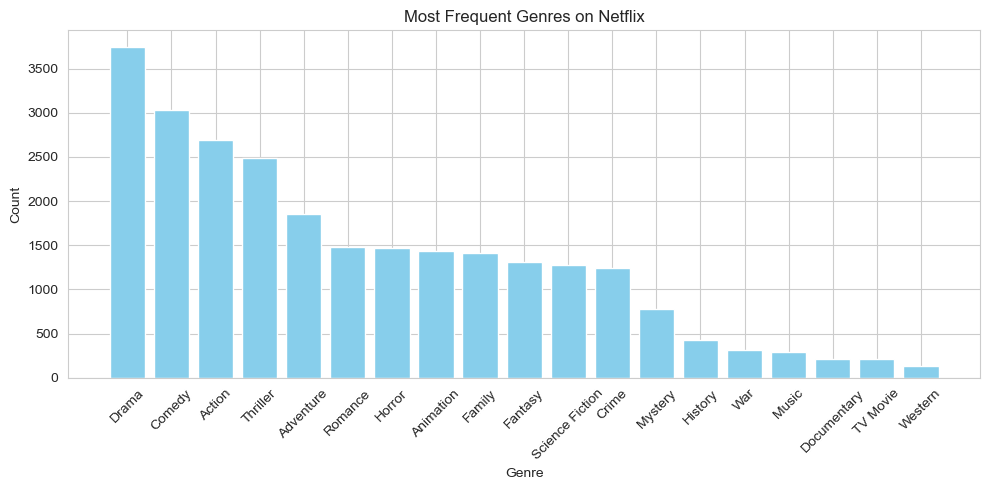

Most frequent genre: Drama


In [21]:
genre_counts = df['Genre'].value_counts()

plt.figure(figsize=(10,5))
plt.bar(genre_counts.index, genre_counts.values, color='skyblue')
plt.title('Most Frequent Genres on Netflix')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("Most frequent genre:", genre_counts.idxmax())



2) What genres has highest votes?

C:\Users\alokb\AppData\Local\Temp\ipykernel_3196\3134404624.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  genre_votes = df_clean.groupby('Genre')['Vote_Count'].sum().sort_values(ascending=False)


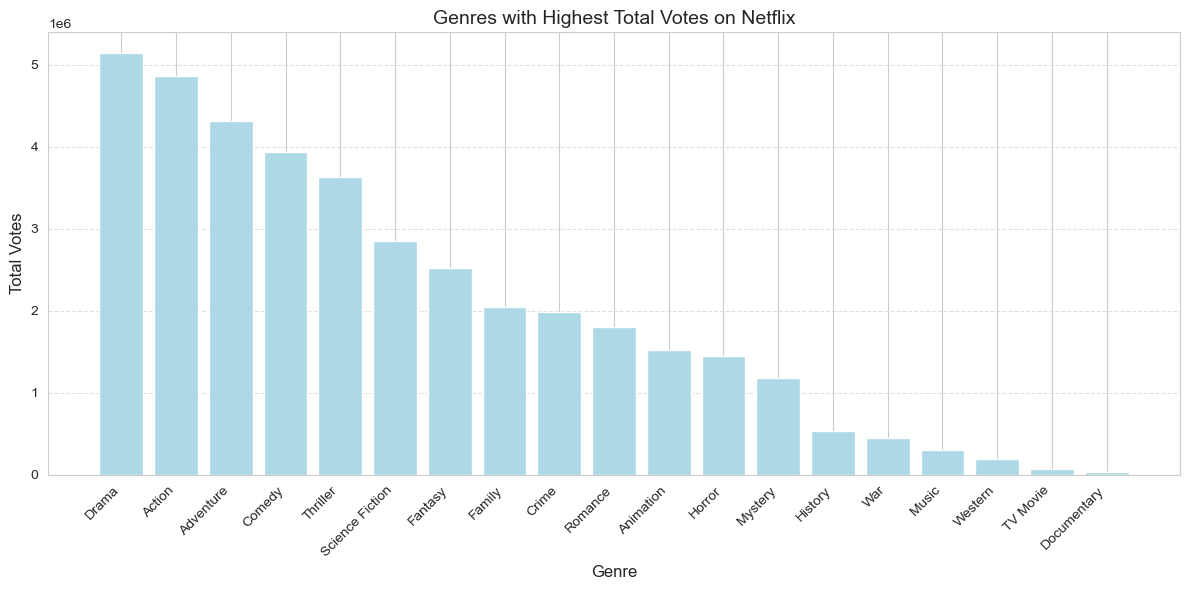

In [22]:

df['Vote_Count'] = pd.to_numeric(df['Vote_Count'], errors='coerce')

df_clean = df.dropna(subset=['Vote_Count', 'Genre'])

genre_votes = df_clean.groupby('Genre')['Vote_Count'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
plt.bar(genre_votes.index, genre_votes.values, color='lightblue')
plt.title('Genres with Highest Total Votes on Netflix', fontsize=14)
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Total Votes', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


What movie got the highest popularity? what's its genre? 

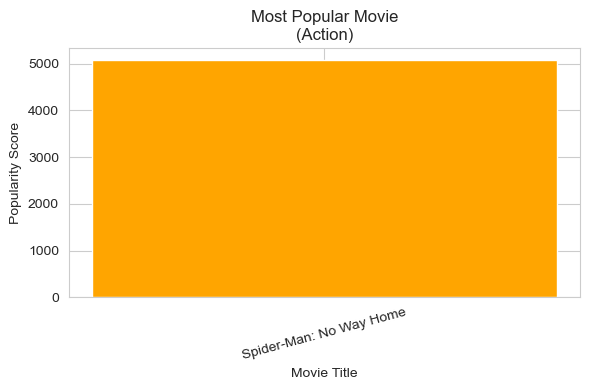

In [23]:

most_popular = df.loc[df['Popularity'].idxmax()]

plt.figure(figsize=(6, 4))
plt.bar(most_popular['Title'], most_popular['Popularity'], color='orange')
plt.title(f"Most Popular Movie\n({most_popular['Genre']})", fontsize=12)
plt.ylabel("Popularity Score")
plt.xlabel("Movie Title")
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


4) What movie got the lowest popularity? what's its genre? 

In [24]:
least_popular = df.loc[df['Popularity'].idxmin()]
print("Movie with Lowest Popularity:")
print("Title :", least_popular['Title'])
print("Genre :", least_popular['Genre'])
print("Popularity Score :", least_popular['Popularity'])


Movie with Lowest Popularity:
Title : 61.328
Genre : nan
Popularity Score : 7.1


5) Which year has the most filmmed movies?

In [25]:
# Convert Release_Date to datetime if not already
df['Release_Date'] = pd.to_datetime(df['Release_Date'], errors='coerce')

df['Year'] = df['Release_Date'].dt.year

most_movies_year = df['Year'].value_counts().idxmax()

print("Year with the most movies filmed:", most_movies_year)


Year with the most movies filmed: 1970.0
